# What do I need to do for the report?
1. BUild a model - how to build a model?
2. Know how to implement HMM - how?
3. Need to know the structure of data I'm dealing with (decide on pandas or numpy etc) - how?
4. Know how data is stored - how?
5. Extract read counts and store in some form - how?
6. Know how to extract and from where I can extract - how?
7. Think and look up where read counts can be extracted from - how?
8. Look at bam/SAM website & my bam files I have - how?
9. Update my bam files - how?
10. Run my REVISED code (by Clem, just * changed) - how?
11. Go to Beluga and type the command - how?
12. Log into MobaXTerm - how?
13. Bring my diary and type the pwd in - how?
14. Note down the password on my laptop, or I can't access without the diary

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
fin = "460_ALU_TypeREF_MELT2_GIAB_test-version.csv"

In [3]:
df = pd.read_csv(fin)
df = df.astype(str)
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1
...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1


In [4]:
#df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"] + "-" + df["STOP"]
df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"].str[:6]
df["merged_name2"] = df["merged_name"].str[:10]
df["merged_name3"] = df["merged_name"].str[:9]
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1,chrX:112877,chrX:11287,chrX:1128
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1,chrX:119643,chrX:11964,chrX:1196
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1,chrX:135157,chrX:13515,chrX:1351
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1,chrX:138384,chrX:13838,chrX:1383


In [5]:
df_01 = df[df["GIAB"] == "0/1"]
df_01["merged_name3"].to_csv("GIAB_460_10_loci_3.csv", index=False, header=False)

In [6]:
df_11 = df[df["GIAB"] == "1/1"]
df_11["merged_name3"].to_csv("GIAB_460_11_loci_3.csv", index=False, header=False)

In [7]:
df_01

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,21,30601827,30602144,0/1,34,14,0/1,39,12,0/1,"-81.21,-32.51,-435.02",0/1,chr21:306018,chr21:3060,chr21:306
223,21,38961715,38961986,0/1,27,7,0/1,23,3,0/1,"-24.4,-17.46,-264.04",0/1,chr21:389617,chr21:3896,chr21:389
224,21,41586880,41587182,0/1,27,10,0/1,44,9,0/1,"-34.81,-18.66,-249.01",0/1,chr21:415868,chr21:4158,chr21:415
225,21,41957251,41957376,0/1,14,11,0/1,21,12,0/1,"-46.41,-25.29,-346.01",0/1,chr21:419572,chr21:4195,chr21:419


# Part 2

In [8]:
f00 = "GIAB_00_f2.csv"
f10 = "GIAB_10_f2.csv"
f11 = "GIAB_11_f2.csv"

In [9]:
df00 = pd.read_csv(f00, header=None)
df10 = pd.read_csv(f10, header=None)
df11 = pd.read_csv(f11, header=None)
df00 = df00.astype(str)
df10 = df10.astype(str)
df11 = df11.astype(str)
df00

,0
0,chr10:2402963-2403297/ 0/0 210 12 222
1,chr10:51539308-51539401/ 0/0 52 18 70
2,chr10:75969790-75970127/ 0/0 248 22 270
3,chr10:79764973-79765218/ 0/0 188 20 208
4,chr10:8516524-8516843/ 0/0 218 22 240
...,...
95,chr9:77503386-77503546/ 0/0 96 46 142
96,chrX:113850728-113851049/ 0/0 84 12 96
97,chrX:43238081-43238371/ 0/0 74 12 86
98,chrX:54290473-54290777/ 0/0 112 4 116


In [10]:
# split column into multiple columns by delimiter 
df00 = df00[0].str.split(' ', expand=True)
df10 = df10[0].str.split(' ', expand=True)
df11 = df11[0].str.split(' ', expand=True)

df00

,0,1,2,3,4
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [11]:
# locus = dir_name
df00.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df10.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df11.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df00

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [12]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df00 = df00.astype(dict_type_convert)
df10 = df10.astype(dict_type_convert)
df11 = df11.astype(dict_type_convert)
# print(df00.dtypes)

In [13]:
frames = [df00, df10, df11]
df_560 = pd.concat(frames)
# Remove the '/' at the end of directory name
df_560["locus"] = df_560["locus"].str.split("/").str[0]
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0/0,210,12,222
1,chr10:51539308-51539401,0/0,52,18,70
2,chr10:75969790-75970127,0/0,248,22,270
3,chr10:79764973-79765218,0/0,188,20,208
4,chr10:8516524-8516843,0/0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,1/1,24,38,62
232,chrX:119643312-119643638,1/1,24,62,86
233,chrX:135157983-135158330,1/1,24,46,70
234,chrX:138384895-138385237,1/1,16,44,60


In [14]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
179,chr6:65185149-65185476,1/0,108,36,144
4,chr10:32705727-32706075,1/1,38,102,140
17,chr16:19582838-19583179,0/0,216,12,228
12,chr11:109976700-109977038,1/1,46,106,152
69,chr17:12196580-12196911,1/1,36,100,136


In [15]:
df_560.groupby(by="GIAB_genotype")["f2_count_REF"].mean()

GIAB_genotype
0/0    171.900000
1/0     90.348214
1/1     45.737288
Name: f2_count_REF, dtype: float64

In [16]:
df_560["GIAB_genotype"] = df_560["GIAB_genotype"].map({"0/0":0,
                             "1/0":1,
                             "1/1":2,
                             np.nan:3},
                             na_action=None)
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0,210,12,222
1,chr10:51539308-51539401,0,52,18,70
2,chr10:75969790-75970127,0,248,22,270
3,chr10:79764973-79765218,0,188,20,208
4,chr10:8516524-8516843,0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,2,24,38,62
232,chrX:119643312-119643638,2,24,62,86
233,chrX:135157983-135158330,2,24,46,70
234,chrX:138384895-138385237,2,16,44,60


In [17]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
207,chr8:42585904-42586256,1,134,68,202
154,chr5:3499262-3499594,1,90,78,168
46,chr13:72956711-72957034,2,40,40,80
172,chr6:154686518-154686805,1,60,44,104
59,chr4:121224545-121224880,0,174,14,188


In [19]:
# from sklearn import datasets
#iris = datasets.load_iris()
#X = iris.data[:, :]
#y = iris.target

In [ ]:
#X

In [26]:
y = df_560["GIAB_genotype"].to_numpy()
#y

In [27]:
X = df_560.iloc[:, 2:].to_numpy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2, random_state=42)
## Check out what "random_state=42" represents

In [29]:
clf = LinearSVC(penalty="l2", loss="squared_hinge", 
                dual=True, tol=0.0001, C=100, multi_class="ovr",
                fit_intercept=True, intercept_scaling=1, class_weight=None,
                verbose=0, random_state=0, max_iter=100000)
clf.fit(X_train, y_train)

print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.766
Accuracy of linear SVC on test set: 0.705


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [31]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

,f2_count_REF,f2_count_ALT,f2_count
0,210.0,12.0,222.0
1,52.0,18.0,70.0
2,248.0,22.0,270.0
3,188.0,20.0,208.0
4,218.0,22.0,240.0
...,...,...,...
555,24.0,38.0,62.0
556,24.0,62.0,86.0
557,24.0,46.0,70.0
558,16.0,44.0,60.0


In [32]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "1/0", "1/1"])
df_GIAB_2_y

,0/0,1/0,1/1
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
555,0,0,1
556,0,0,1
557,0,0,1
558,0,0,1


In [33]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """build the Keras model callback"""
    model = Sequential()
    model.add(Dense(6, input_dim=3, activation='tanh', name='layer_1'))
    model.add(Dense(10, activation='tanh', name='layer_2'))
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

<ipython-input-33-c7f27e87d569>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(


In [34]:
history = estimator.fit(X_train, y_train)

Epoch 1/200
23/23 - 1s - loss: 0.9940 - accuracy: 0.5112 - 706ms/epoch - 31ms/step
Epoch 2/200
23/23 - 0s - loss: 0.9523 - accuracy: 0.4487 - 36ms/epoch - 2ms/step
Epoch 3/200
23/23 - 0s - loss: 0.9153 - accuracy: 0.4665 - 37ms/epoch - 2ms/step
Epoch 4/200
23/23 - 0s - loss: 0.8809 - accuracy: 0.4978 - 40ms/epoch - 2ms/step
Epoch 5/200
23/23 - 0s - loss: 0.8477 - accuracy: 0.5781 - 42ms/epoch - 2ms/step
Epoch 6/200
23/23 - 0s - loss: 0.8120 - accuracy: 0.5692 - 44ms/epoch - 2ms/step
Epoch 7/200
23/23 - 0s - loss: 0.7782 - accuracy: 0.6317 - 40ms/epoch - 2ms/step
Epoch 8/200
23/23 - 0s - loss: 0.7436 - accuracy: 0.6473 - 31ms/epoch - 1ms/step
Epoch 9/200
23/23 - 0s - loss: 0.7099 - accuracy: 0.6830 - 31ms/epoch - 1ms/step
Epoch 10/200
23/23 - 0s - loss: 0.6784 - accuracy: 0.7344 - 45ms/epoch - 2ms/step
Epoch 11/200
23/23 - 0s - loss: 0.6488 - accuracy: 0.7612 - 44ms/epoch - 2ms/step
Epoch 12/200
23/23 - 0s - loss: 0.6216 - accuracy: 0.7946 - 36ms/epoch - 2ms/step
Epoch 13/200
23/23 - 0s

Epoch 101/200
23/23 - 0s - loss: 0.3549 - accuracy: 0.8906 - 32ms/epoch - 1ms/step
Epoch 102/200
23/23 - 0s - loss: 0.3536 - accuracy: 0.8929 - 31ms/epoch - 1ms/step
Epoch 103/200
23/23 - 0s - loss: 0.3522 - accuracy: 0.8929 - 34ms/epoch - 1ms/step
Epoch 104/200
23/23 - 0s - loss: 0.3514 - accuracy: 0.8906 - 34ms/epoch - 1ms/step
Epoch 105/200
23/23 - 0s - loss: 0.3499 - accuracy: 0.8929 - 29ms/epoch - 1ms/step
Epoch 106/200
23/23 - 0s - loss: 0.3492 - accuracy: 0.8862 - 29ms/epoch - 1ms/step
Epoch 107/200
23/23 - 0s - loss: 0.3520 - accuracy: 0.8951 - 30ms/epoch - 1ms/step
Epoch 108/200
23/23 - 0s - loss: 0.3476 - accuracy: 0.8951 - 30ms/epoch - 1ms/step
Epoch 109/200
23/23 - 0s - loss: 0.3475 - accuracy: 0.8973 - 33ms/epoch - 1ms/step
Epoch 110/200
23/23 - 0s - loss: 0.3455 - accuracy: 0.8906 - 30ms/epoch - 1ms/step
Epoch 111/200
23/23 - 0s - loss: 0.3441 - accuracy: 0.8929 - 30ms/epoch - 1ms/step
Epoch 112/200
23/23 - 0s - loss: 0.3438 - accuracy: 0.8906 - 36ms/epoch - 2ms/step
Epoc

Epoch 200/200
23/23 - 0s - loss: 0.2633 - accuracy: 0.9040 - 66ms/epoch - 3ms/step


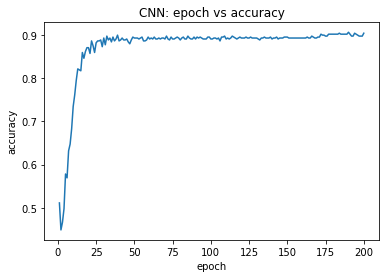

In [35]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("CNN: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 


In [36]:
print(history.params)
history.history['loss']
#history.history['accuracy']
# check the keys of history object
#print(history.history)

{'verbose': 2, 'epochs': 200, 'steps': 23}


[0.993975043296814,
 0.9522811770439148,
 0.9153302311897278,
 0.880874514579773,
 0.847668468952179,
 0.812009334564209,
 0.778191089630127,
 0.743597149848938,
 0.7098737359046936,
 0.6784013509750366,
 0.6487827897071838,
 0.6215742230415344,
 0.5973721146583557,
 0.5765157341957092,
 0.5572614073753357,
 0.5417715311050415,
 0.525721549987793,
 0.5121443867683411,
 0.5023475885391235,
 0.489971786737442,
 0.4823629856109619,
 0.47317391633987427,
 0.46569758653640747,
 0.46036288142204285,
 0.45327630639076233,
 0.448557049036026,
 0.4426935613155365,
 0.43869659304618835,
 0.43576449155807495,
 0.4318312108516693,
 0.4310123324394226,
 0.4246799349784851,
 0.4222262501716614,
 0.4196169972419739,
 0.4174894392490387,
 0.41506245732307434,
 0.41457033157348633,
 0.4106656610965729,
 0.40967702865600586,
 0.40827593207359314,
 0.4054124355316162,
 0.4061211049556732,
 0.4029189944267273,
 0.4014572203159332,
 0.40000373125076294,
 0.3998410105705261,
 0.3984202444553375,
 0.39820393

In [37]:
from tensorflow.keras.losses import MeanSquaredError

In [38]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='tanh', name='layer_1'))
model2.add(Dense(10, activation='tanh', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [39]:
model().fit(X_train, y_train, epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 4ms/step - loss: 1.0650 - accuracy: 0.4062
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0325 - accuracy: 0.4263
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.6205
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9776 - accuracy: 0.5424
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9542 - accuracy: 0.4911
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9309 - accuracy: 0.5134
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9080 - accuracy: 0.5179
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8845 - accuracy: 0.5290
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 0.8607 - accuracy: 0.5536
Epoch 10/200
14/14 [==============================] - 0s 5ms/step - loss: 0.8369 - accuracy: 0.5848
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.3791 - accuracy: 0.8973
Epoch 82/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8929
Epoch 83/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8929
Epoch 84/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.8929
Epoch 85/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8906
Epoch 86/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8929
Epoch 87/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8951
Epoch 88/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8951
Epoch 89/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8951
Epoch 90/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 0.8951
Epoch 91/200


14/14 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8906
Epoch 163/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8906
Epoch 164/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8929
Epoch 165/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8906
Epoch 166/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8929
Epoch 167/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8951
Epoch 168/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8951
Epoch 169/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8906
Epoch 170/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8906
Epoch 171/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8951
Epoc

In [40]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 

array([[0.2639091 , 0.4245919 , 0.31149897],
       [0.29823804, 0.3722598 , 0.32950214],
       [0.30941364, 0.3474241 , 0.34316227],
       [0.31129205, 0.3223275 , 0.36638045],
       [0.3244974 , 0.32765132, 0.3478513 ],
       [0.30591995, 0.35664624, 0.33743382],
       [0.30591995, 0.35664624, 0.33743382],
       [0.2951612 , 0.36698252, 0.33785632],
       [0.2871331 , 0.36855093, 0.34431604],
       [0.27646455, 0.40363848, 0.319897  ],
       [0.28081748, 0.39686972, 0.3223128 ],
       [0.2897688 , 0.3796422 , 0.330589  ],
       [0.29786155, 0.36087388, 0.34126452],
       [0.30756944, 0.3406014 , 0.3518291 ],
       [0.316463  , 0.32569304, 0.357844  ],
       [0.28650337, 0.3756279 , 0.33786866],
       [0.32220528, 0.33455372, 0.34324098],
       [0.29838008, 0.35630015, 0.34531975],
       [0.29908484, 0.36121747, 0.33969775],
       [0.2972451 , 0.3651843 , 0.3375706 ],
       [0.28100353, 0.39851126, 0.32048514],
       [0.31239092, 0.32525858, 0.3623505 ],
       [0.

In [41]:
model().evaluate(X_test, y_test)

4/4 [==============================] - 1s 2ms/step - loss: 1.1254 - accuracy: 0.2143


[1.1253834962844849, 0.2142857164144516]

In [42]:
pred_for_val = estimator.predict(dtest_for_val_ini)

NameError: name 'dtest_for_val_ini' is not defined

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
results